In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [17]:
import gc
import cPickle as pickle
import fastparquet
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [159]:
a=pd.read_csv("../submission/kk_surprise-me-h2o-automl-version-ver5-lb-0-479.csv")

In [44]:
data=fastparquet.ParquetFile("../input/train_test.parq").to_pandas()

In [46]:
get_ma(1)
get_sma(1)
data['lag1_visitors_sma_1']=lag_v(data['visitors_sma_1'].values,1)
data['lag1_visitors_ma_1']=lag_v(data['visitors_ma_1'].values,1)

In [47]:
data=data[~data['visitors'].isnull()]

In [48]:
data['geo1']=data['geo1'].map(lambda u: u.decode('unicode-escape'))

In [49]:
bads= (pickle.load(open("../2_jupyter/bad_instance.pkl")))

In [50]:
data['id']=data[['air_store_id','visit_date']].apply(lambda u: tuple(u.values),axis=1)

In [51]:
data['bad']=data['id'].map(lambda u: 1 if u in bads else 0)

In [52]:
data.head()

air_store_id  visit_date  visitors     geo1  geo1_store_count  \
index                                                                  
182               0         182  3.583519  TÅkyÅ               444   
183               0         183  2.302585  TÅkyÅ               444   
185               0         185  3.044523  TÅkyÅ               444   
186               0         186  3.258096  TÅkyÅ               444   
187               0         187  3.401197  TÅkyÅ               444   

       geo1_visitors_count  geo1_visitors_mean     geo2  geo2_store_count  \
index                                                                       
182                    412            3.029005  Chiyoda                22   
183                    386            2.989726  Chiyoda                22   
185                    338            2.585321  Chiyoda                22   
186                    394            2.695859  Chiyoda                22   
187                    392            2.761697  Chiyoda                22   

       geo2_visitors_count ...   day_of_week_visitors_count  \
index                      ...                                
182                     20 ...                          757   
183                     15 ...                          737   
185                     20 ...                          623   
186                     20 ...                          703   
187                     19 ...                          714   

      day_of_week_visitors_mean  holiday  is_rain  visitors_ma_1  \
index                                                              
182                    3.001422      0.0      0.0       3.583519   
183                    3.053427      0.0      0.0       2.302585   
185                    2.590666      0.0      0.0       3.044523   
186                    2.653889      0.0      1.0       3.258096   
187                    2.745007      0.0      0.0       3.401197   

      visitors_sma_1  lag1_visitors_sma_1  lag1_visitors_ma_1        id  bad  
index                                                                         
182         3.583519                  NaN                 NaN  (0, 182)    1  
183         2.302585             3.583519            3.583519  (0, 183)    1  
185         3.044523                  NaN                 NaN  (0, 185)    0  
186         3.258096             3.044523            3.044523  (0, 186)    0  
187         3.401197             3.258096            3.258096  (0, 187)    0  

[5 rows x 35 columns]

In [53]:
data['bad'].mean()

0.18558316277151063

In [132]:
rawdata=data

In [149]:
#data=rawdata

In [150]:
data=rawdata[rawdata['visit_date']>200]

In [151]:
store_std=data[['air_store_id','visitors']].groupby(['air_store_id']).std()
store_mean=data[['air_store_id','visitors']].groupby(['air_store_id']).mean()

In [152]:
bad_count=data[['bad','air_store_id']].groupby(['air_store_id']).mean().sort_values('bad',ascending=False)

In [156]:
pickle.dump(bad_count['bad'].to_dict(), open('bad_store.pkl','wb'))

In [146]:
tmpdf=pd.concat([store_mean,store_std,bad_count],1).fillna(-1)
tmpdf.columns=['store_mean','store_std','store_bad_count']

In [142]:
tmpdf1=tmpdf

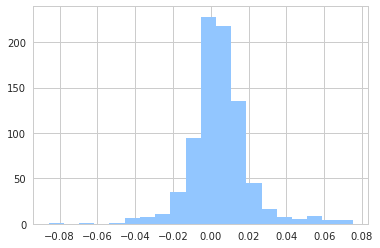

In [148]:
(tmpdf-tmpdf1)['store_bad_count'].hist(bins=20);

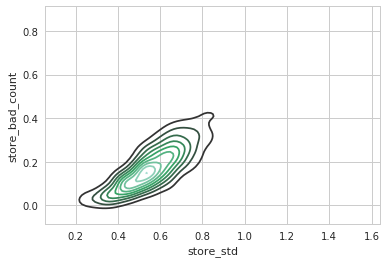

In [137]:
sns.kdeplot(tmpdf['store_std'],tmpdf['store_bad_count'])

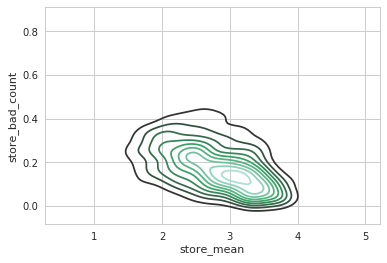

In [138]:
sns.kdeplot(tmpdf['store_mean'],tmpdf['store_bad_count'])

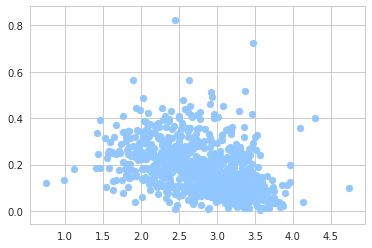

In [139]:
plt.scatter(tmpdf['store_mean'],tmpdf['store_bad_count'])

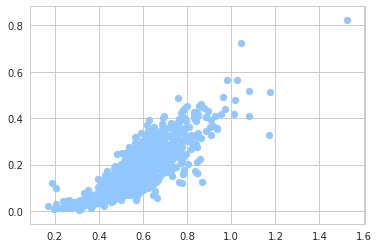

In [140]:
plt.scatter(tmpdf['store_std'],tmpdf['store_bad_count'])

In [54]:
df0=data[data['bad']==0]
df1=data[data['bad']==1]

In [105]:
(data['visitors']<1).mean()

0.019083091373538325

In [106]:
(df0['visitors']<1).mean()

0.0036284646967431485

In [107]:
(df1['visitors']<1).mean()

0.08690448201423473

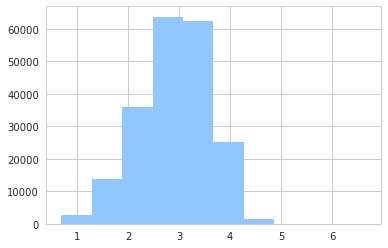

In [111]:
df0['visitors'].hist();

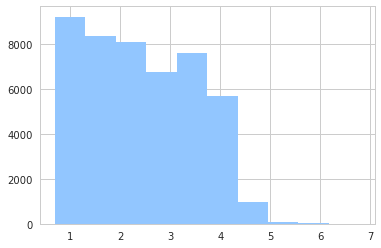

In [110]:
df1['visitors'].hist();

In [117]:
df0[['visitors','holiday']].groupby('holiday').count()/df0.shape[0]

visitors
holiday          
0.0      0.954481
1.0      0.045519

In [118]:
df1[['visitors','holiday']].groupby('holiday').count()/df1.shape[0]

visitors
holiday          
0.0       0.92671
1.0       0.07329

In [122]:
df0[['visitors','is_rain','holiday']].groupby(['is_rain','holiday']).count()/df0.shape[0]

visitors
is_rain holiday          
0.0     0.0      0.640534
        1.0      0.030669
1.0     0.0      0.313947
        1.0      0.014850

In [123]:
df1[['visitors','is_rain','holiday']].groupby(['is_rain','holiday']).count()/df1.shape[0]

visitors
is_rain holiday          
0.0     0.0      0.599419
        1.0      0.047898
1.0     0.0      0.327292
        1.0      0.025392

In [55]:
df0[['visitors','lag1_visitors_sma_1']].corr()

visitors  lag1_visitors_sma_1
visitors             1.000000             0.642871
lag1_visitors_sma_1  0.642871             1.000000

In [56]:
df1[['visitors','lag1_visitors_sma_1']].corr()

visitors  lag1_visitors_sma_1
visitors             1.000000             0.258996
lag1_visitors_sma_1  0.258996             1.000000

[]

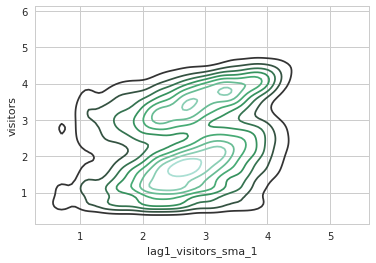

In [67]:
tmpdf=df1[['visitors','lag1_visitors_sma_1']].dropna()
sns.kdeplot(tmpdf['lag1_visitors_sma_1'][:10000],tmpdf['visitors'][:10000])


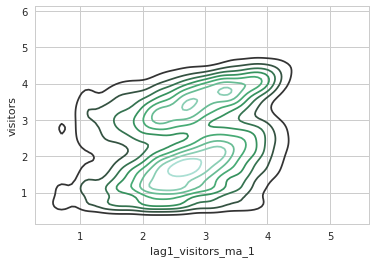

In [63]:
tmpdf=df1[['visitors','lag1_visitors_ma_1']].dropna()
sns.kdeplot(tmpdf['lag1_visitors_ma_1'][:10000],tmpdf['visitors'][:10000])

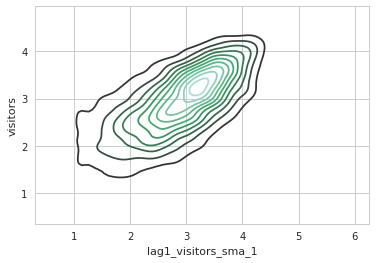

In [64]:
tmpdf=df0[['visitors','lag1_visitors_sma_1']].dropna()
sns.kdeplot(tmpdf['lag1_visitors_sma_1'][:10000],tmpdf['visitors'][:10000])

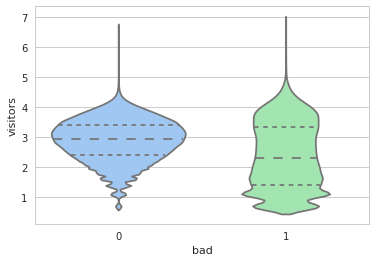

In [20]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="bad", y="visitors", hue=None, data=data, split=True,
               inner="quart")
sns.despine(left=True)

In [36]:
get_sma(1)
data['lag1_visitors_sma_1']=lag_v(data['visitors_sma_1'].values,1)

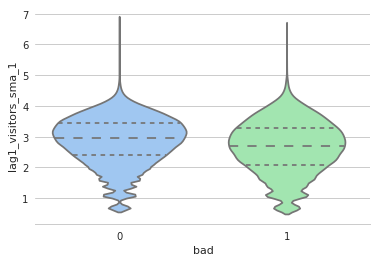

In [37]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="bad", y="lag1_visitors_sma_1", hue=None, data=data, split=True,
               inner="quart")
sns.despine(left=True)

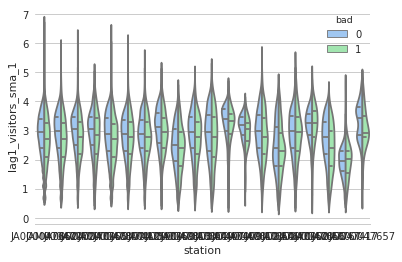

In [38]:
sns.violinplot(x="station", y="lag1_visitors_sma_1", hue='bad', data=data, split=True,
               inner="quart")
sns.despine(left=True)

In [29]:
def nancorr2(a,b):
    idx0=(~np.isnan(a))
    idx=idx0 & (~np.isnan(b))
    a=a[idx].flatten().astype(np.float64);b=b[idx].flatten().astype(np.float64)
    return np.corrcoef(a,b)[0,1],idx.sum()/float(idx0.sum())
def lag_v(v,lag=1): #assume v is same order as data
    tmpdf=data[['air_store_id','visit_date']].copy()
    tmpdf2=tmpdf.copy()
    tmpdf2['v']=v
    tmpdf2['visit_date']=tmpdf2['visit_date']+lag
    df=pd.merge(tmpdf,tmpdf2,how="left",on=['air_store_id','visit_date'])
    return df['v'].values
    
def lag_y(lag=1):
    return lag_v(data['visitors'].values,lag=lag)
def ma(period=3):
    s=0
    sd=0.0
    for i in range(period):
        a=lag_y(i)
        ind=np.isnan(a)
        sd+= ~ind
        a[ind]=0
        s+=a
    sd[sd<period//2]=np.nan
    return s/sd
def lag_ma(lag=1,period=3):
    return lag_v(ma(period=period),lag=lag)
def season_ma(period=3):
    s=0
    sd=0.0
    for i in range(period):
        a=lag_y(i*7)
        ind=np.isnan(a)
        sd+= ~ind
        a[ind]=0
        s+=a
    sd[sd<period//2]=np.nan        
    return s/sd
def lag_season_ma(lag=1,period=3):
    return lag_v(season_ma(period=period),lag=lag*7)
def get_ma(p):
    c="visitors_ma_"+str(p)
    if c not in data.columns:
        s=ma(period=p)
        data[c]=s
    return c,data[c].values
def get_sma(p):
    c="visitors_sma_"+str(p)
    if c not in data.columns:
        s=season_ma(period=p)
        data[c]=s
    return c,data[c].values
                